In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [122]:
df = pd.read_csv('autompg.csv', 
                  names=["mpg", "cylinders", "displacement", "horsepower","weight","acceleration","model_year","car_name"])
df = df.replace(r'\t',' ', regex=True)
df['car_name'] = df['car_name'].str.replace('"', '')
df['car_name'] = df['car_name'].str[1:]

df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,car_name
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,ford torino
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,ford ranger


In [123]:
df['car_name'] = df['car_name'].str.lstrip()
df[['make','car_name']] = df['car_name'].str.split(" ",1, expand=True)

In [124]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,car_name,make
0,18.0,8,307.0,130,3504,12.0,70,chevelle malibu,chevrolet
1,15.0,8,350.0,165,3693,11.5,70,skylark 320,buick
2,18.0,8,318.0,150,3436,11.0,70,satellite,plymouth
3,16.0,8,304.0,150,3433,12.0,70,rebel sst,amc
4,17.0,8,302.0,140,3449,10.5,70,torino,ford
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,mustang gl,ford
394,44.0,4,97.0,52,2130,24.6,82,pickup,vw
395,32.0,4,135.0,84,2295,11.6,82,rampage,dodge
396,28.0,4,120.0,79,2625,18.6,82,ranger,ford


In [5]:
df["make"].value_counts()


ford             51
chevrolet        43
plymouth         31
dodge            28
amc              28
toyota           25
datsun           23
buick            17
pontiac          16
volkswagen       15
honda            13
mercury          11
mazda            10
oldsmobile       10
fiat              8
peugeot           8
audi              7
chrysler          6
volvo             6
vw                6
renault           5
saab              4
opel              4
subaru            4
chevy             3
cadillac          2
bmw               2
maxda             2
mercedes-benz     2
nissan            1
toyouta           1
mercedes          1
triumph           1
hi                1
vokswagen         1
chevroelt         1
capri             1
Name: make, dtype: int64

In [6]:
df["cylinders"].value_counts()

4    204
8    103
6     84
3      4
5      3
Name: cylinders, dtype: int64

In [7]:
# Cars with 4 and 5 cylinders seem to be most fuel efficient.

sorted_df = df.groupby(["cylinders"]).mean()

sorted_df

,mpg,displacement,weight,acceleration,model_year
cylinders,,,,,
3,20.550000,72.500000,2398.500000,13.250000,75.500000
4,29.286765,109.796569,2308.127451,16.601471,77.073529
5,27.366667,145.000000,3103.333333,18.633333,79.000000
6,19.985714,218.142857,3198.226190,16.263095,75.928571
8,14.963107,345.009709,4114.718447,12.955340,73.902913


In [8]:
#Higher weight equals less fuel efficiency.

sorted_df = df.groupby(["weight"]).mean()

sorted_df

,mpg,cylinders,displacement,acceleration,model_year
weight,,,,,
1613,35.0,4.0,72.0,18.0,71.0
1649,31.0,4.0,76.0,16.5,74.0
1755,39.1,4.0,79.0,16.9,81.0
1760,35.1,4.0,81.0,16.1,81.0
1773,31.0,4.0,71.0,19.0,71.0
...,...,...,...,...,...
4951,12.0,8.0,455.0,11.0,73.0
4952,12.0,8.0,429.0,11.5,73.0
4955,12.0,8.0,383.0,11.5,71.0


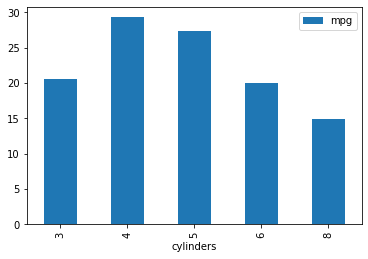

In [9]:
# Created a visual to see relation between cylinders and mpg. 

sorted_df = df.groupby(["cylinders"]).mean()['mpg']

sorted_df = pd.DataFrame(sorted_df)

sorted_df.plot(kind="bar")

In [10]:
# fe_df = fuel efficient df

fe_df = df.loc[df['cylinders'] == 4.0 ]

fe_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,car_name,make
14,24.0,4,113.0,95,2372,15.0,70,corona mark ii,toyota
18,27.0,4,97.0,88,2130,14.5,70,pl510,datsun
19,26.0,4,97.0,46,1835,20.5,70,1131 deluxe sedan,volkswagen
20,25.0,4,110.0,87,2672,17.5,70,504,peugeot
21,24.0,4,107.0,90,2430,14.5,70,100 ls,audi
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,mustang gl,ford
394,44.0,4,97.0,52,2130,24.6,82,pickup,vw
395,32.0,4,135.0,84,2295,11.6,82,rampage,dodge
396,28.0,4,120.0,79,2625,18.6,82,ranger,ford


In [11]:
moy_df =df.groupby(['model_year']).mean()['mpg'] 

moy_df

model_year
70    17.689655
71    21.250000
72    18.714286
73    17.100000
74    22.703704
75    20.266667
76    21.573529
77    23.375000
78    24.061111
79    25.093103
80    33.696552
81    30.334483
82    31.709677
Name: mpg, dtype: float64

,mpg
model_year,
70,17.689655
71,21.250000
72,18.714286
73,17.100000
74,22.703704
75,20.266667
76,21.573529
77,23.375000
78,24.061111


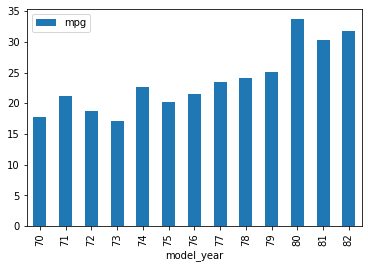

In [12]:
#Bar graph shows mpg increasing on average over the years. 

moy_df = pd.DataFrame(moy_df)

moy_df.plot(kind="bar")

moy_df

In [13]:
#wt = weight


wt_df =df.groupby(['make']).mean()['mpg'] 

wt_df = pd.DataFrame(wt_df)

wt_df


,mpg
make,
amc,18.246429
audi,26.714286
bmw,23.750000
buick,19.182353
cadillac,19.750000
capri,25.000000
chevroelt,16.000000
chevrolet,20.472093
chevy,18.000000


In [134]:
df = df[df.horsepower != '?']

In [135]:
df['horsepower'] = df['horsepower'].astype(float)

In [44]:
X = df.drop(columns = ['mpg', 'car_name','make'], axis=1)
y = df['mpg'].values.reshape(-1, 1)
print(X.shape, y.shape)

(392, 6) (392, 1)


In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [41]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [42]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

In [43]:
### BEGIN SOLUTION
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.8094457132305747
Testing Score: 0.7988753559406917


# Logistic Regression Model

In [145]:

df = df[df.groupby('make').make.transform(len)>24]

df['make'].value_counts()

ford         48
chevrolet    43
plymouth     31
dodge        28
amc          27
toyota       25
Name: make, dtype: int64

In [146]:
X = df.drop(columns = ['make','car_name','model_year', 'cylinders', 'acceleration'], axis=1)
y = df['make'].values.reshape(-1, 1)
print(X.shape, y.shape)

(202, 4) (202, 1)


In [147]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [148]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression()

In [149]:
classifier.fit(X_train, y_train)

C:\Users\jgb21\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\jgb21\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [150]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.31788079470198677
Testing Data Score: 0.29411764705882354


In [151]:
predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   ['ford' 'dodge' 'toyota' 'ford' 'ford' 'ford' 'ford' 'toyota' 'chevrolet'
 'ford']
First 10 Actual labels: [['chevrolet'], ['ford'], ['ford'], ['ford'], ['ford'], ['plymouth'], ['chevrolet'], ['toyota'], ['chevrolet'], ['chevrolet']]


In [152]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

<ipython-input-152-48fcf54f9ca3>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = rf.fit(X_train, y_train)


0.6078431372549019

In [153]:
sorted(zip(rf.feature_importances_, X.columns), reverse=True)

[(0.32540975173553893, 'displacement'),
 (0.2585861586735592, 'horsepower'),
 (0.23984264551629442, 'weight'),
 (0.1761614440746075, 'mpg')]